# ShapeNet

## Dataset

In [1]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet
from torch_geometric.loader import DataLoader

from pytorch_lightning.loggers import WandbLogger

In [5]:
category = 'Airplane'  # Pass in `None` to train on all categories.
path = osp.realpath(osp.join('..', 'data', 'ShapeNet'))

pre_transform, transform = T.NormalizeScale(), T.FixedPoints(200)
test_dataset = ShapeNet(path, category, split='test', transform=transform, pre_transform=pre_transform)
test_dataset = test_dataset[0:20]
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=6)

Processing...
Done!


In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.get(0)

In [ ]:
# data.x contains points features extracted after having applied the transform
# data.pos contains the points coordinates
plotter = plot_cloud(cloud.pos.numpy(), scalars=cloud.y.numpy(), point_size=3.0, notebook=True)

## Model

In [6]:
import wandb
import yaml
from test import configure

In [4]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [5]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [7]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/cwwdv7lr')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [8]:
model, trainer = configure(config)

C:\Users\olvcp\anaconda3\envs\hyperbolic\lib\site-packages\pytorch_lightning\utilities\parsing.py:261: UserWarning: Attribute 'nn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nn'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Distributed:  False
Gpu:  0


In [9]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/cwwdv7lr')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

C:\Users\olvcp\PycharmProjects\HPCS\hpcs\loss\ultrametric_loss.py:81: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2318.)
  lca_triplet = torch.stack([dij, dik, djk]).T


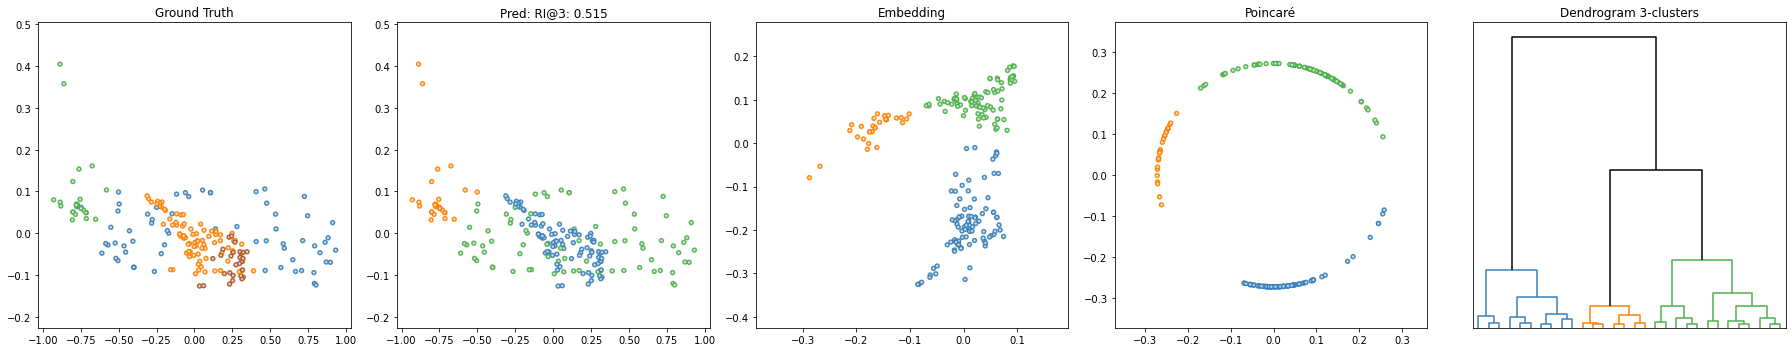

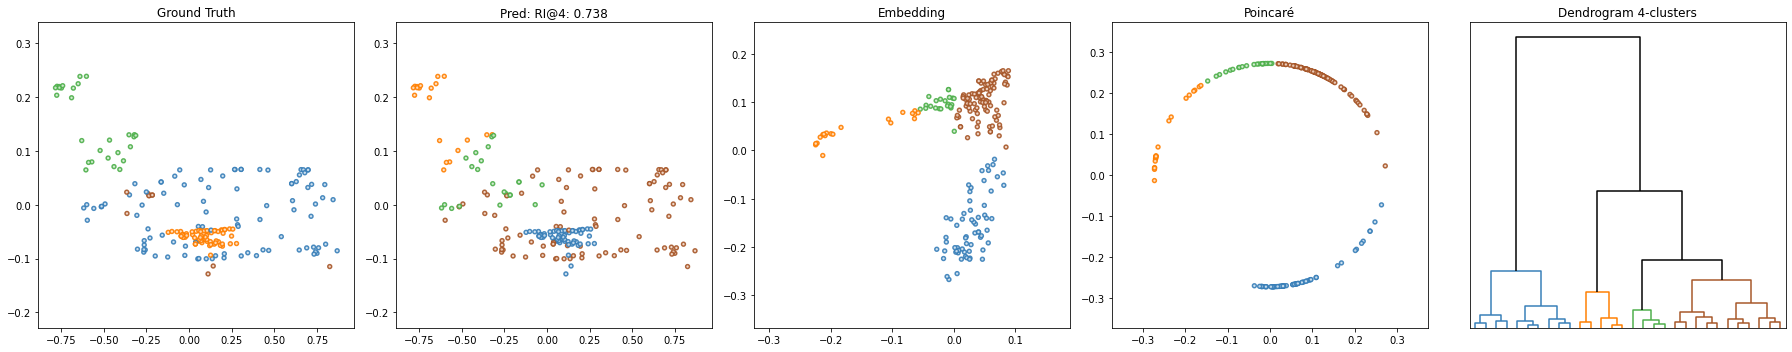

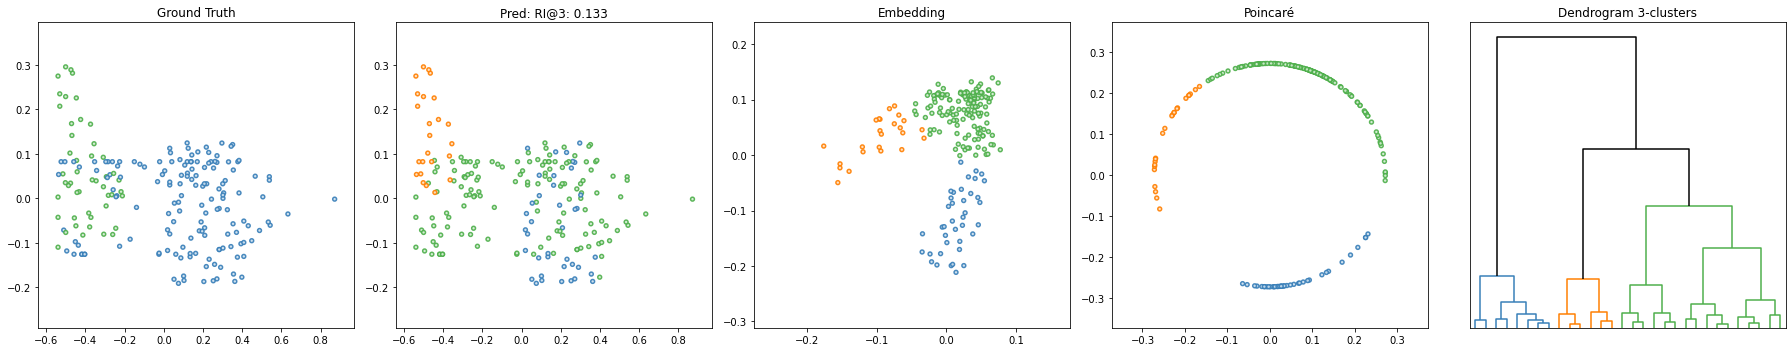

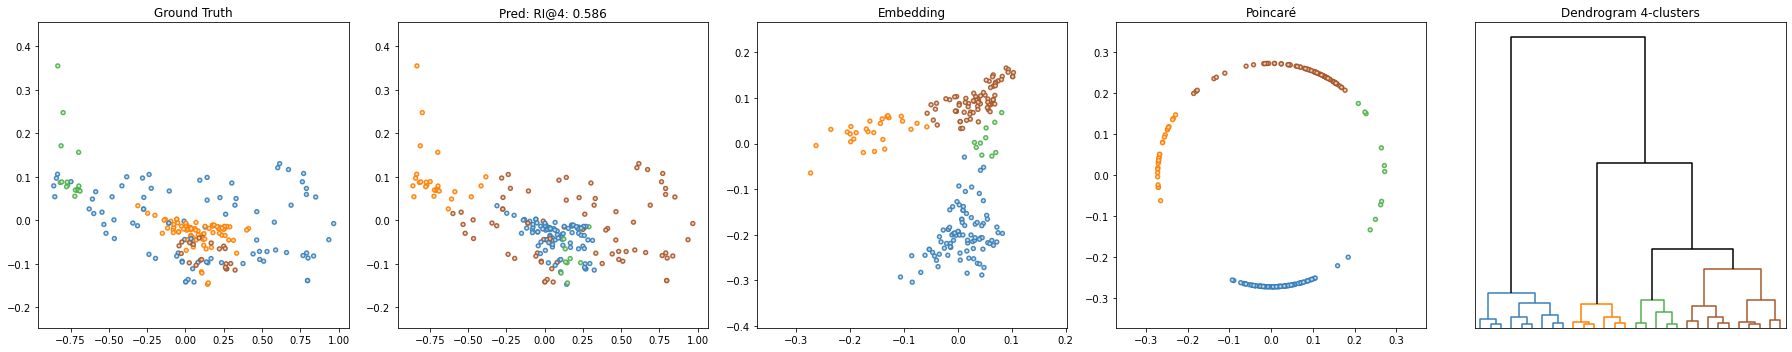

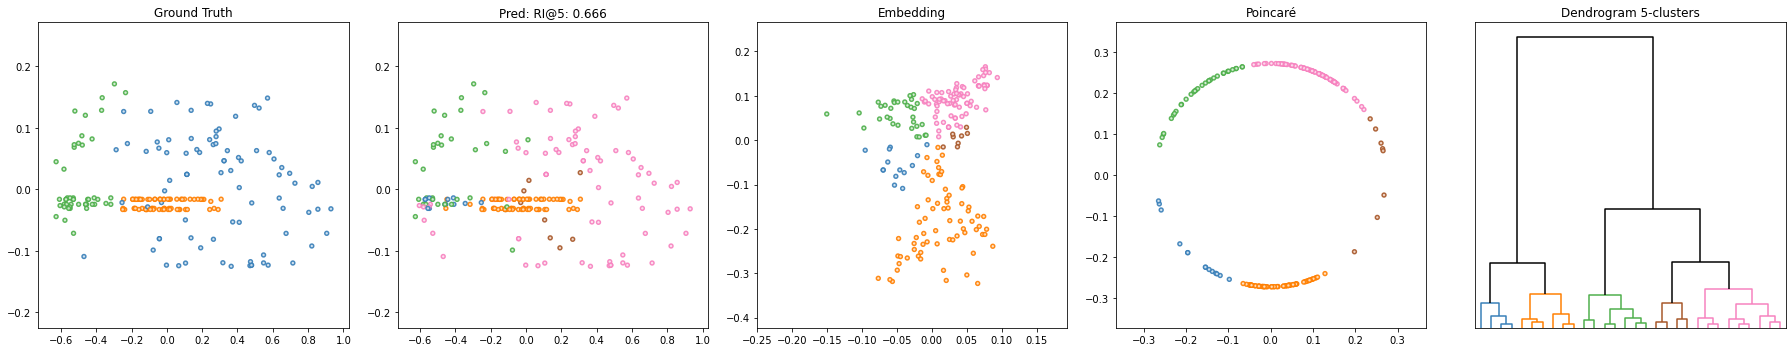

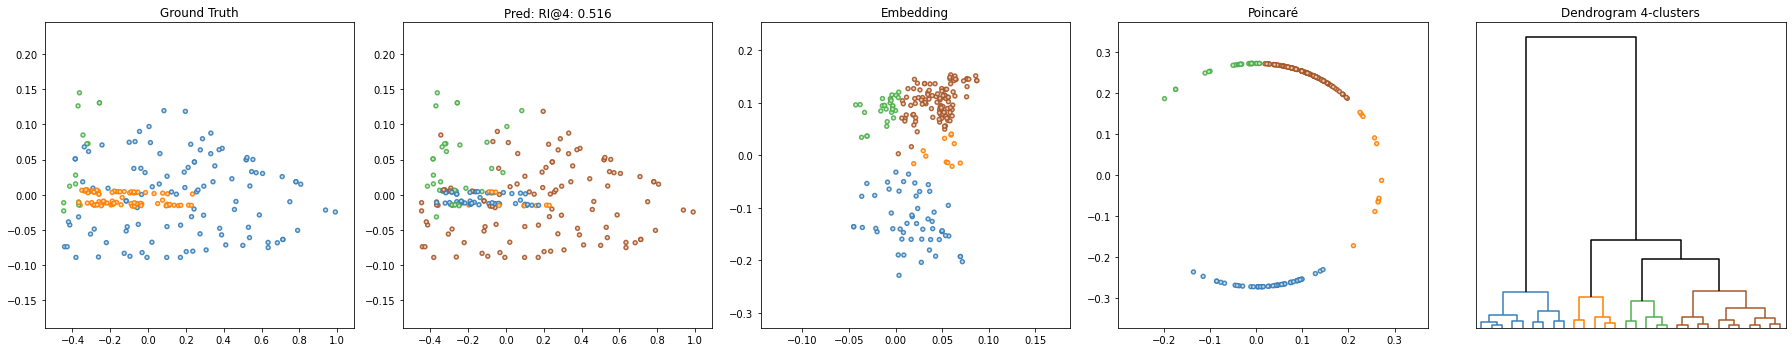

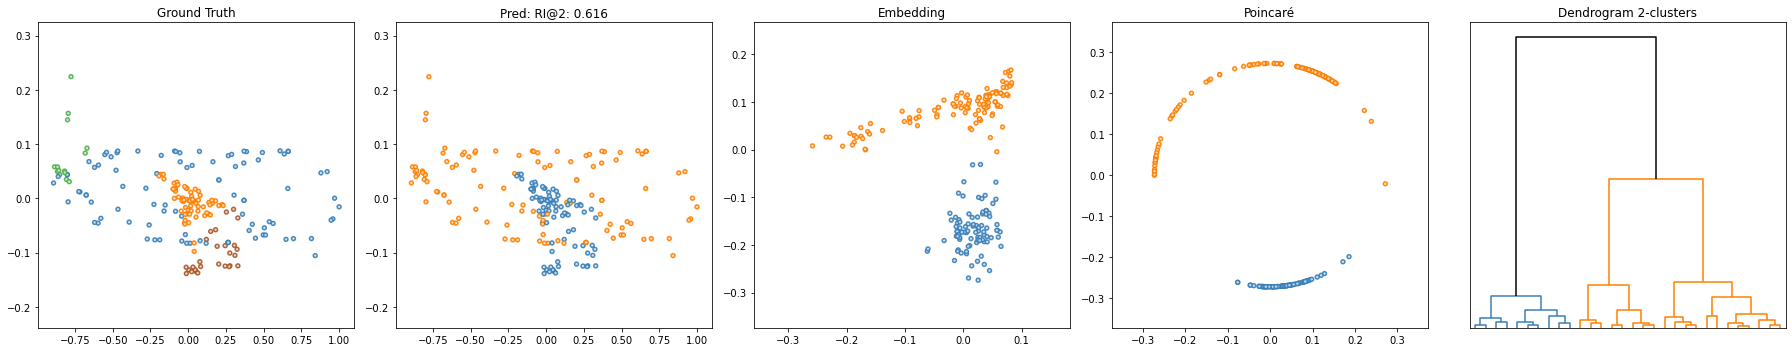

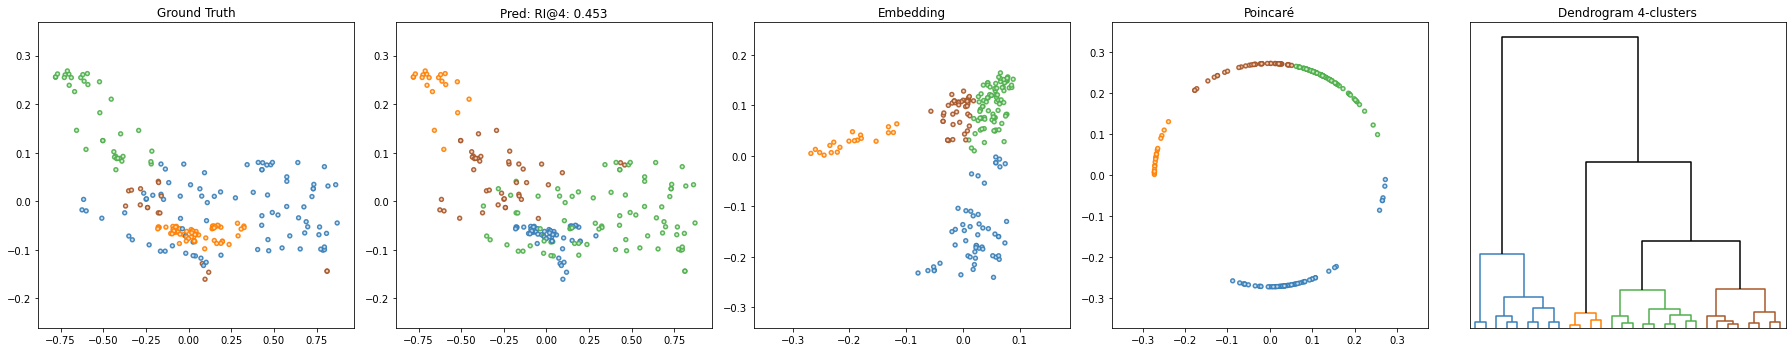

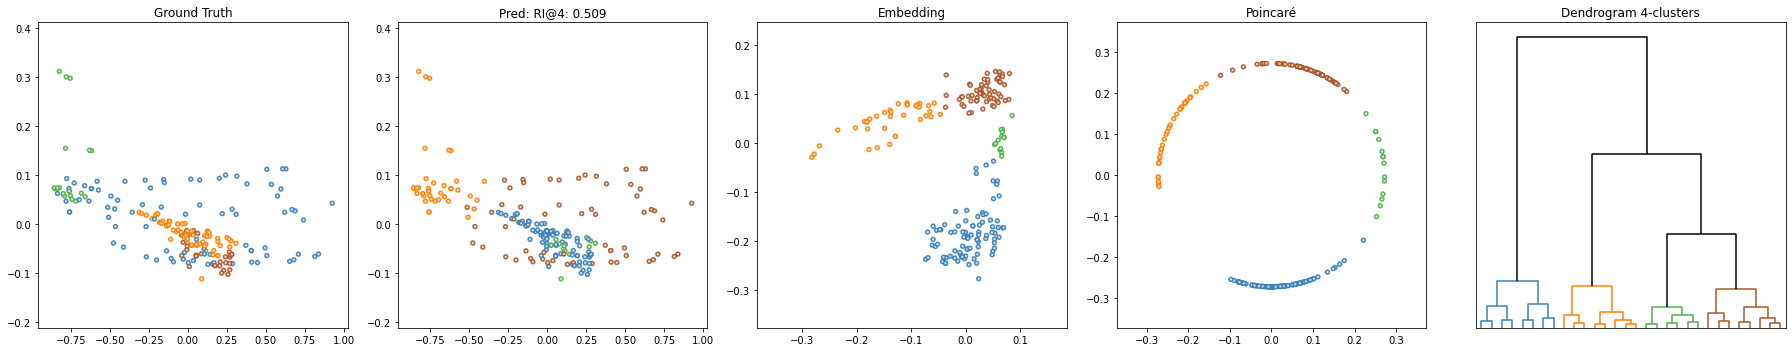

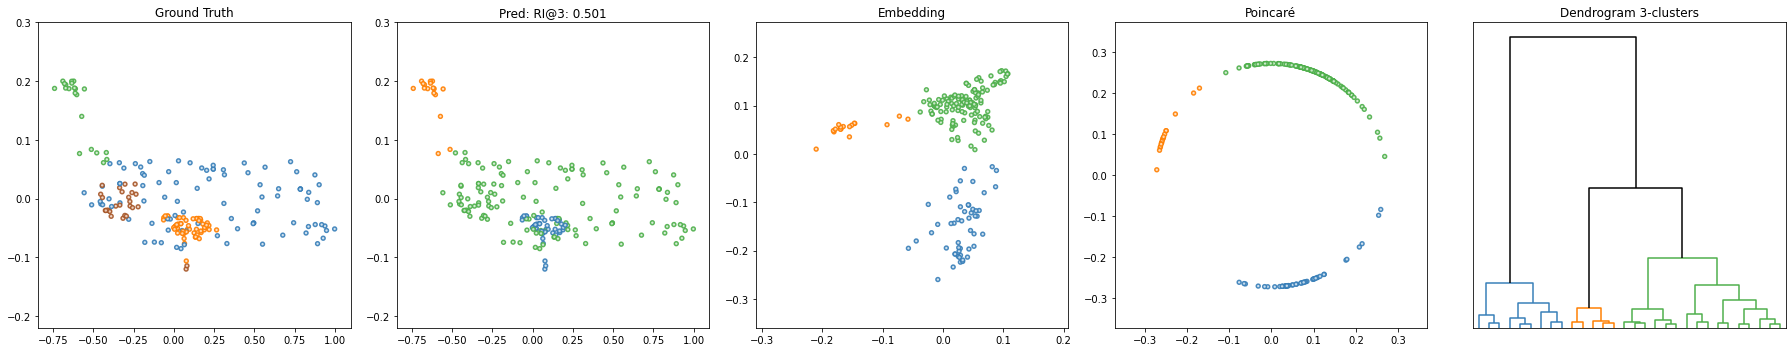

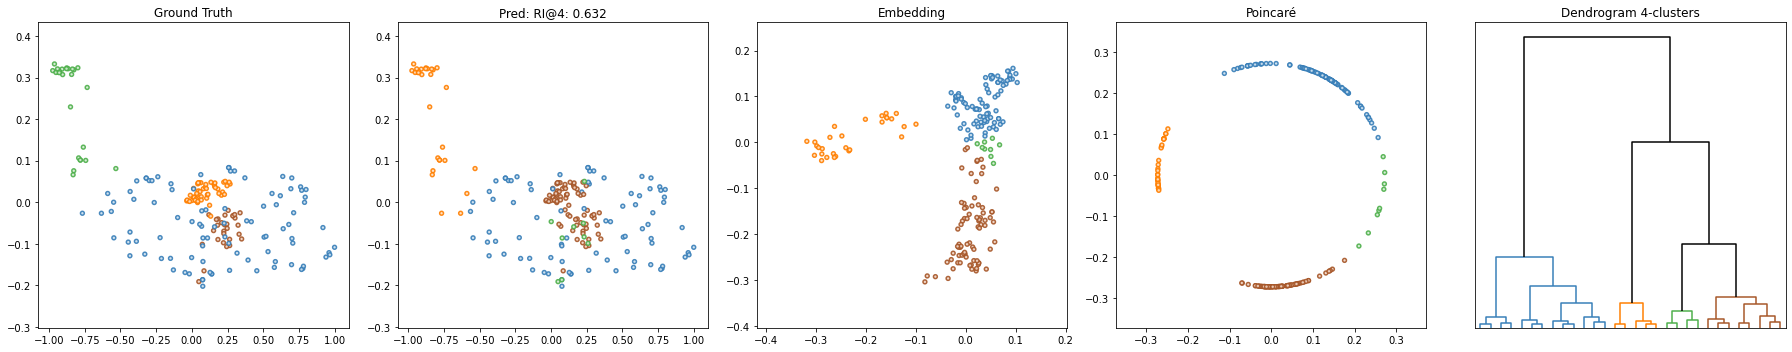

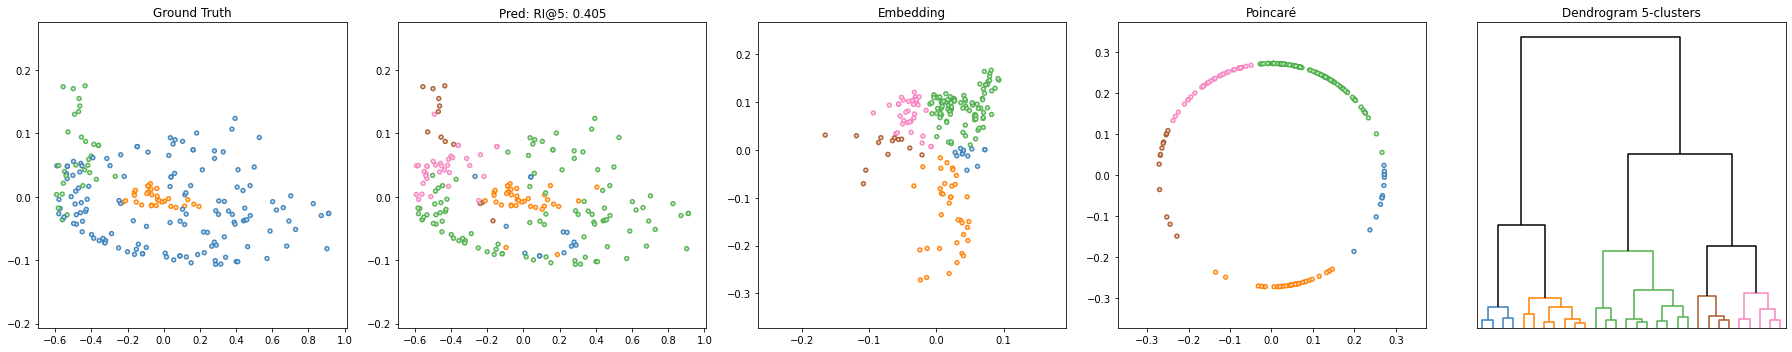

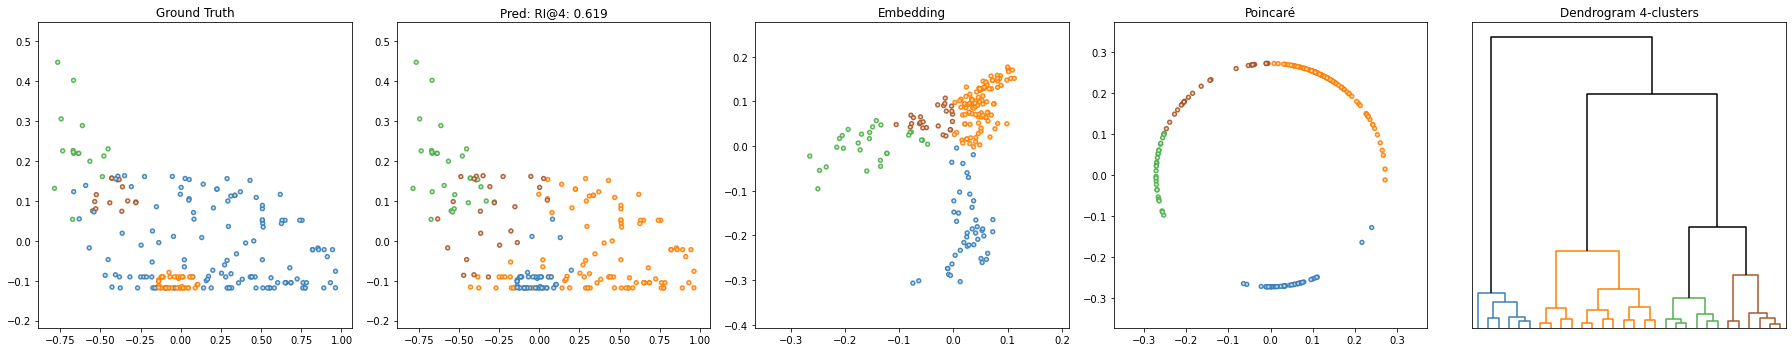

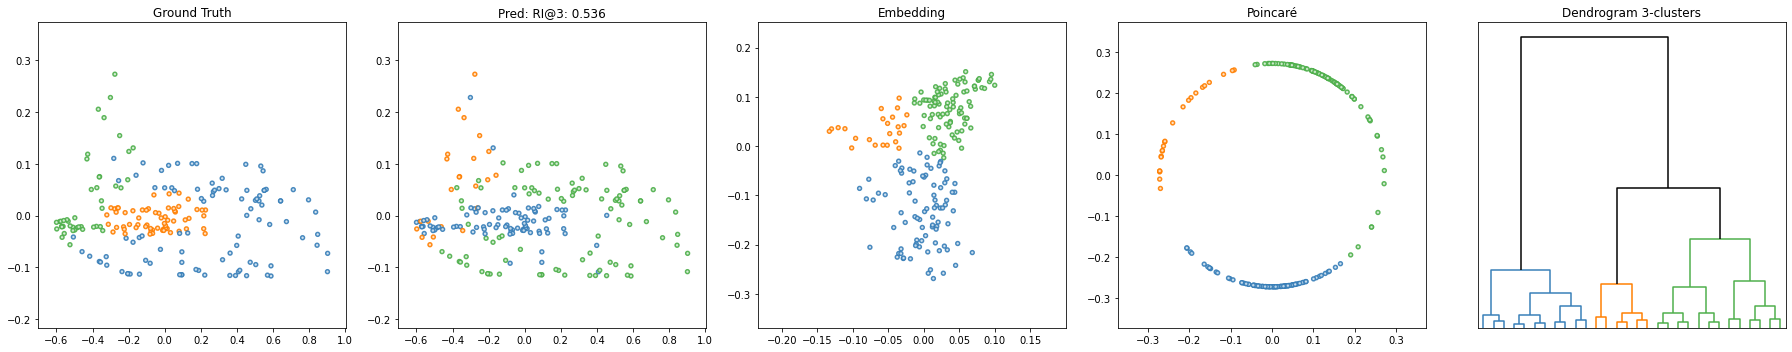

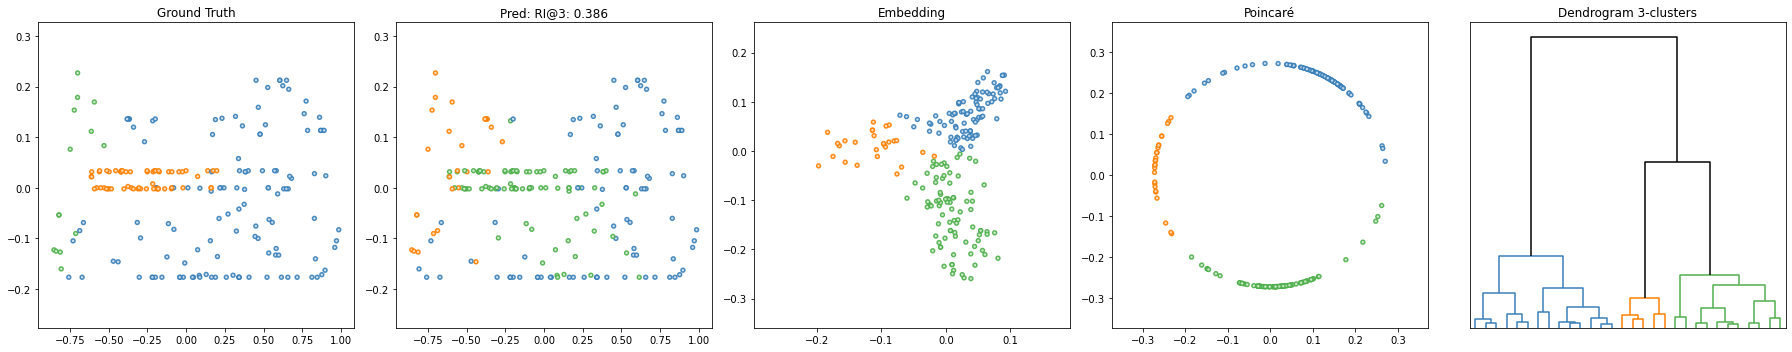

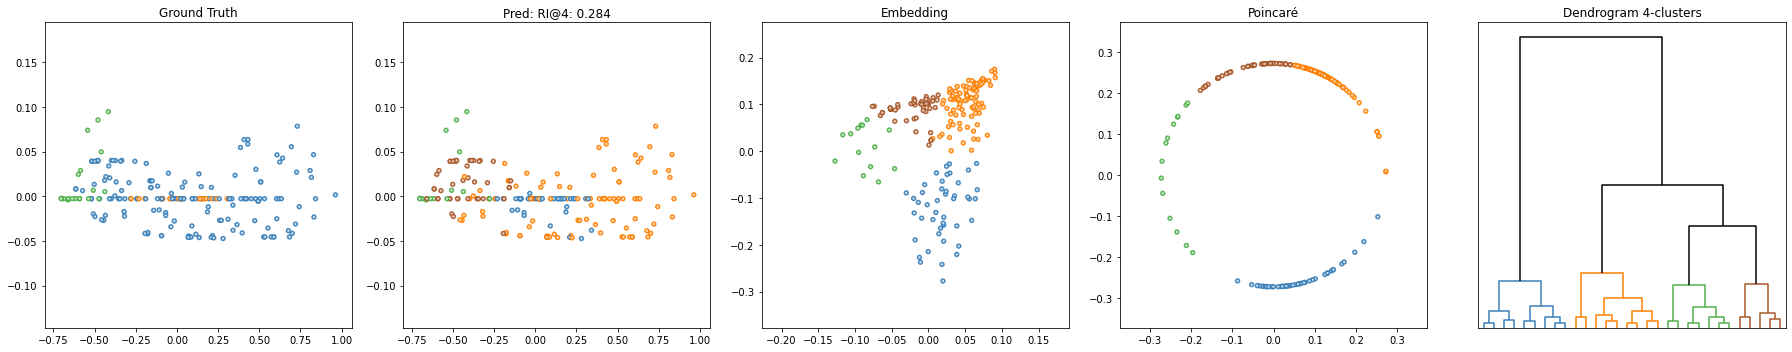

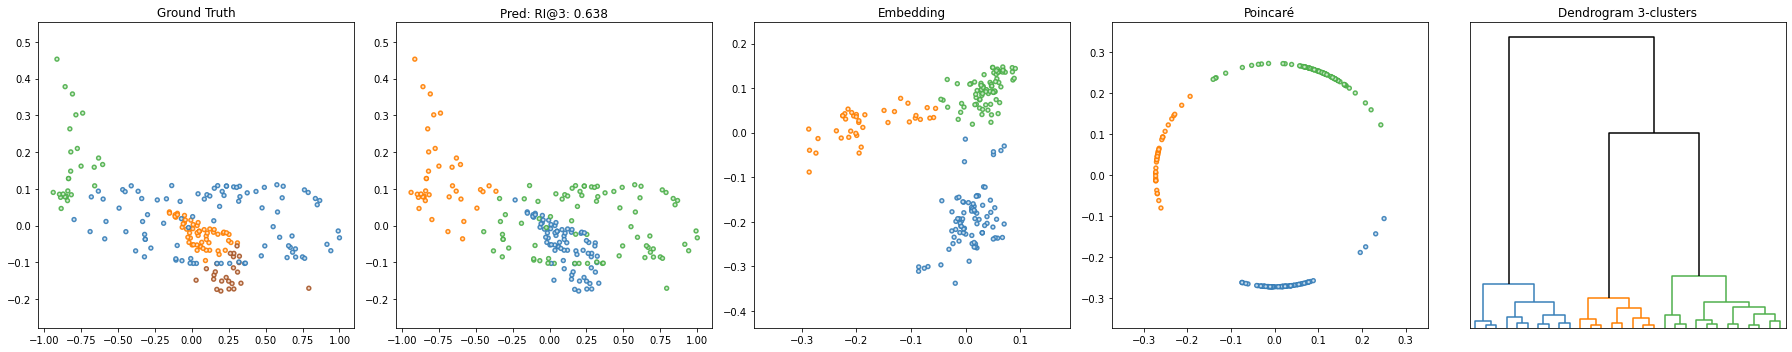

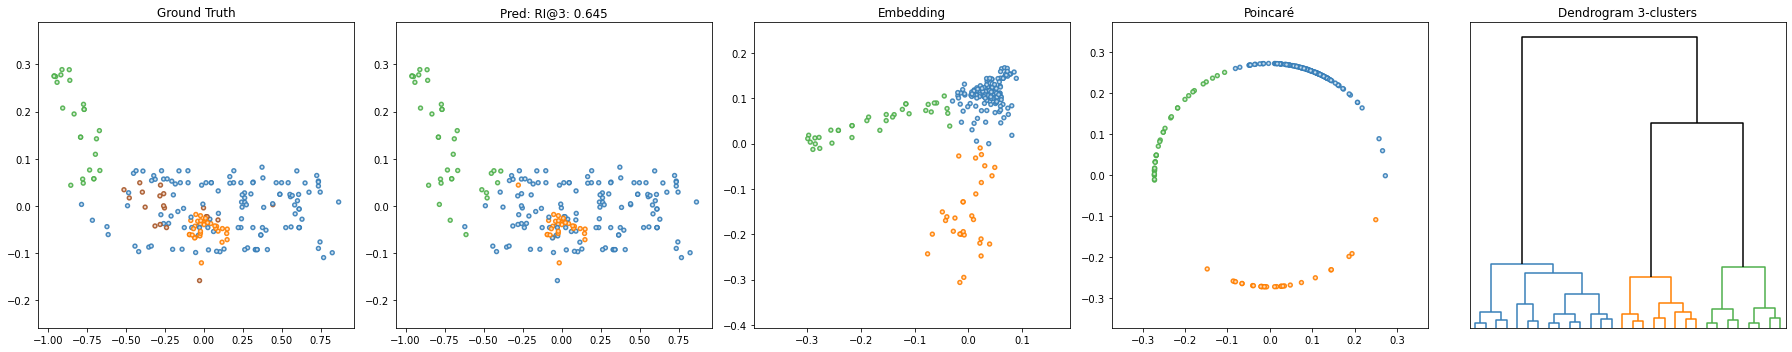

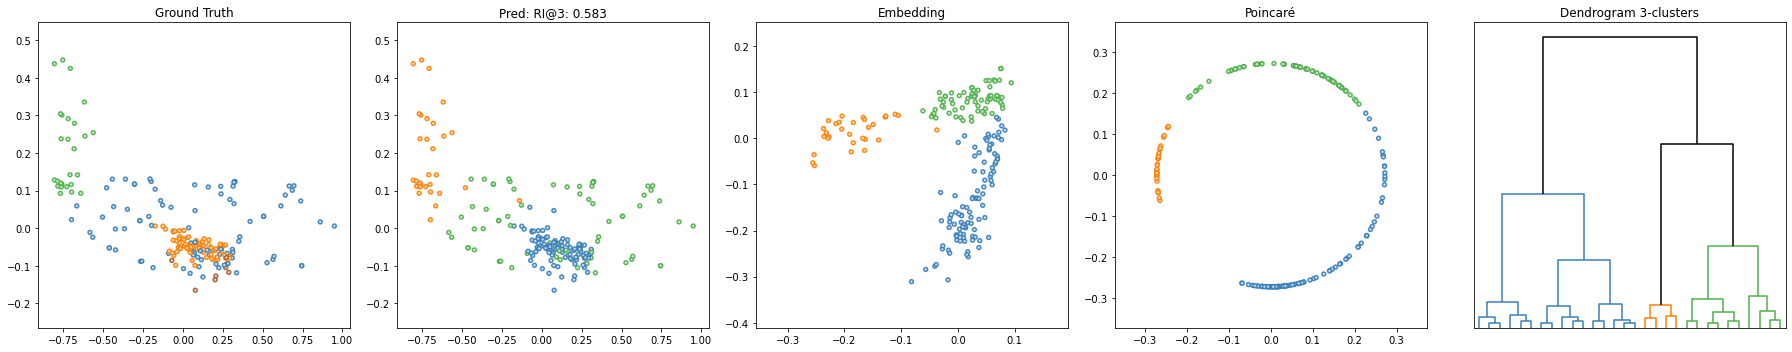

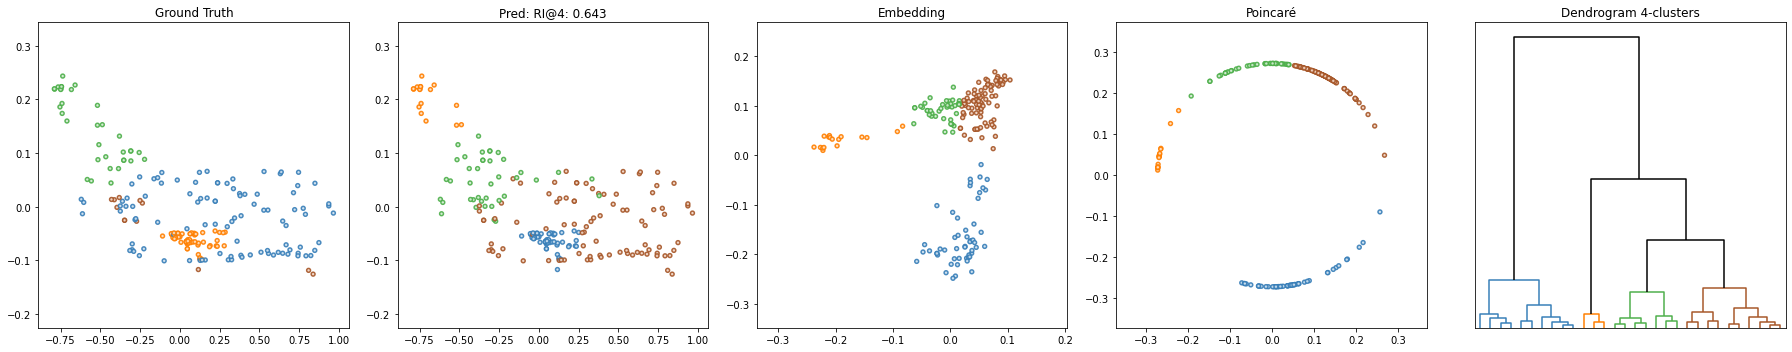

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           2.1291491985321045
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 2.1291491985321045}]

In [11]:
trainer.test(model, test_loader)

In [15]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

scale tensor([0.1386])
model.conv1.nn.lins.0.weight tensor([[-0.0672,  0.3154, -0.0603, -0.1389, -0.1694, -0.0723],
        [ 0.1095, -0.2121,  0.3260, -0.1301, -0.2095,  0.3383],
        [-0.2570,  0.1130,  0.2404,  0.0681,  0.1685,  0.3218],
        [ 0.2591, -0.1765,  0.3593, -0.1345, -0.3320,  0.0468],
        [ 0.2735,  0.2118, -0.3603,  0.3676, -0.2953, -0.0823],
        [ 0.0104, -0.0529,  0.3229, -0.3549,  0.1741,  0.3957],
        [-0.3011, -0.0302, -0.2055, -0.2449, -0.3276,  0.1006],
        [ 0.0208,  0.1633,  0.2858,  0.1584,  0.1801,  0.0303],
        [ 0.2455, -0.1288,  0.1469, -0.0199, -0.3184,  0.3304],
        [ 0.2508,  0.0535,  0.0973, -0.2765,  0.2781,  0.1338],
        [-0.3562,  0.2962,  0.1775,  0.3861,  0.3078, -0.2364],
        [-0.2771,  0.2000,  0.3675, -0.0162, -0.0113, -0.3338],
        [-0.3401,  0.2473, -0.2216,  0.3856, -0.2238, -0.2152],
        [ 0.3280, -0.0152,  0.2760, -0.3897,  0.0506, -0.0493],
        [ 0.2377, -0.2309,  0.3497, -0.0610, -0.0605